<div style="text-align: center; margin: 20px 0;">
    <h2 style="font-weight: bold; font-size: 26px; color: #2E86C1; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
        Diabetes Prediction - Clustering
    </h2>
</div>


<p>The Diabetes Dataset contains medical diagnostic data used for clustering and classification. It includes key health indicators such as glucose levels, blood pressure, BMI, and heart disease status to analyze diabetes risk patterns. The dataset helps in identifying clusters of individuals based on similar health metrics, aiding in predictive modeling and medical research.</p>

<span style="font-style: italic; font-size: 18px;">Features:</span>
<ul>
    <li><strong>Glucose:</strong> Plasma glucose concentration (yes/no), indicating blood sugar levels.</li>  
    <li><strong>BloodPressure:</strong> Diastolic blood pressure (mm Hg), measuring the pressure in arteries between heartbeats.</li>  
    <li><strong>Heart_disease:</strong> Presence of heart disease (yes/no), indicating cardiovascular risk.</li>  
    <li><strong>BMI:</strong> Body Mass Index, calculated as weight (kg) / (height (m))², assessing body fat.</li>  
    <li><strong>Age:</strong> Age of the individual (in years), as age is a risk factor for diabetes.</li>  
    <li><strong>Gender:</strong> Biological sex of the individual (Male/Female), as diabetes risk may vary by gender.</li>  
    <li><strong>Outcome:</strong> Class variable indicating diabetes status (0 = No Diabetes, 1 = Diabetes).</li>  
</ul>



# 1) Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2) Initial Inspection

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\diabetes.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0            1.0           never  25.19   
1     2  Female  54.0           0.0            0.0         No Info  27.32   
2     3    Male  28.0           0.0            0.0           never  27.32   
3     4  Female  36.0           0.0            0.0         current  23.45   
4     5    Male  76.0           1.0            1.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140         0  171.52   74.11  
1          6.6                   80         0  176.48   83.74  
2          5.7                  158         0  163.29   58.46  
3          5.0                  155         0  187.04   52.77  
4          4.8                  155         0  154.72   68.39  
     slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
695   696  Female  62.0           0.0            0.0            ever  27.2

# 3) Handle Missing Values

In [3]:
# Check for missing values in the dataset
print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               0
height                 0
weight                 0
dtype: int64
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.000000
height                 0.000000
weight                 0.000000
dtype: float64
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight       

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">Handled missing values by imputing mean for numericals and mode for categories.Ensure that no missing values remain after the imputation process.</span>

# 4) Drop Columns

In [4]:
# Remove the column 'sl.no',weight,height'
df.drop(columns=['slno','diabetes'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)
print(df.head)


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'height', 'weight'],
      dtype='object')
<bound method NDFrame.head of      gender   age  hypertension  heart_disease smoking_history    bmi  \
0    Female  80.0           0.0            1.0           never  25.19   
1    Female  54.0           0.0            0.0         No Info  27.32   
2      Male  28.0           0.0            0.0           never  27.32   
3    Female  36.0           0.0            0.0         current  23.45   
4      Male  76.0           1.0            1.0         current  20.14   
..      ...   ...           ...            ...             ...    ...   
695  Female  62.0           0.0            0.0            ever  27.27   
696  Female  53.0           0.0            0.0            ever  42.40   
697  Female  55.0           0.0            0.0           never  35.42   
698  Female  64.0           0.0     

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">Dropped traget column from the datset ie diabetes in the dataset.</span>

# 5) Univariate Analysis - Histogram

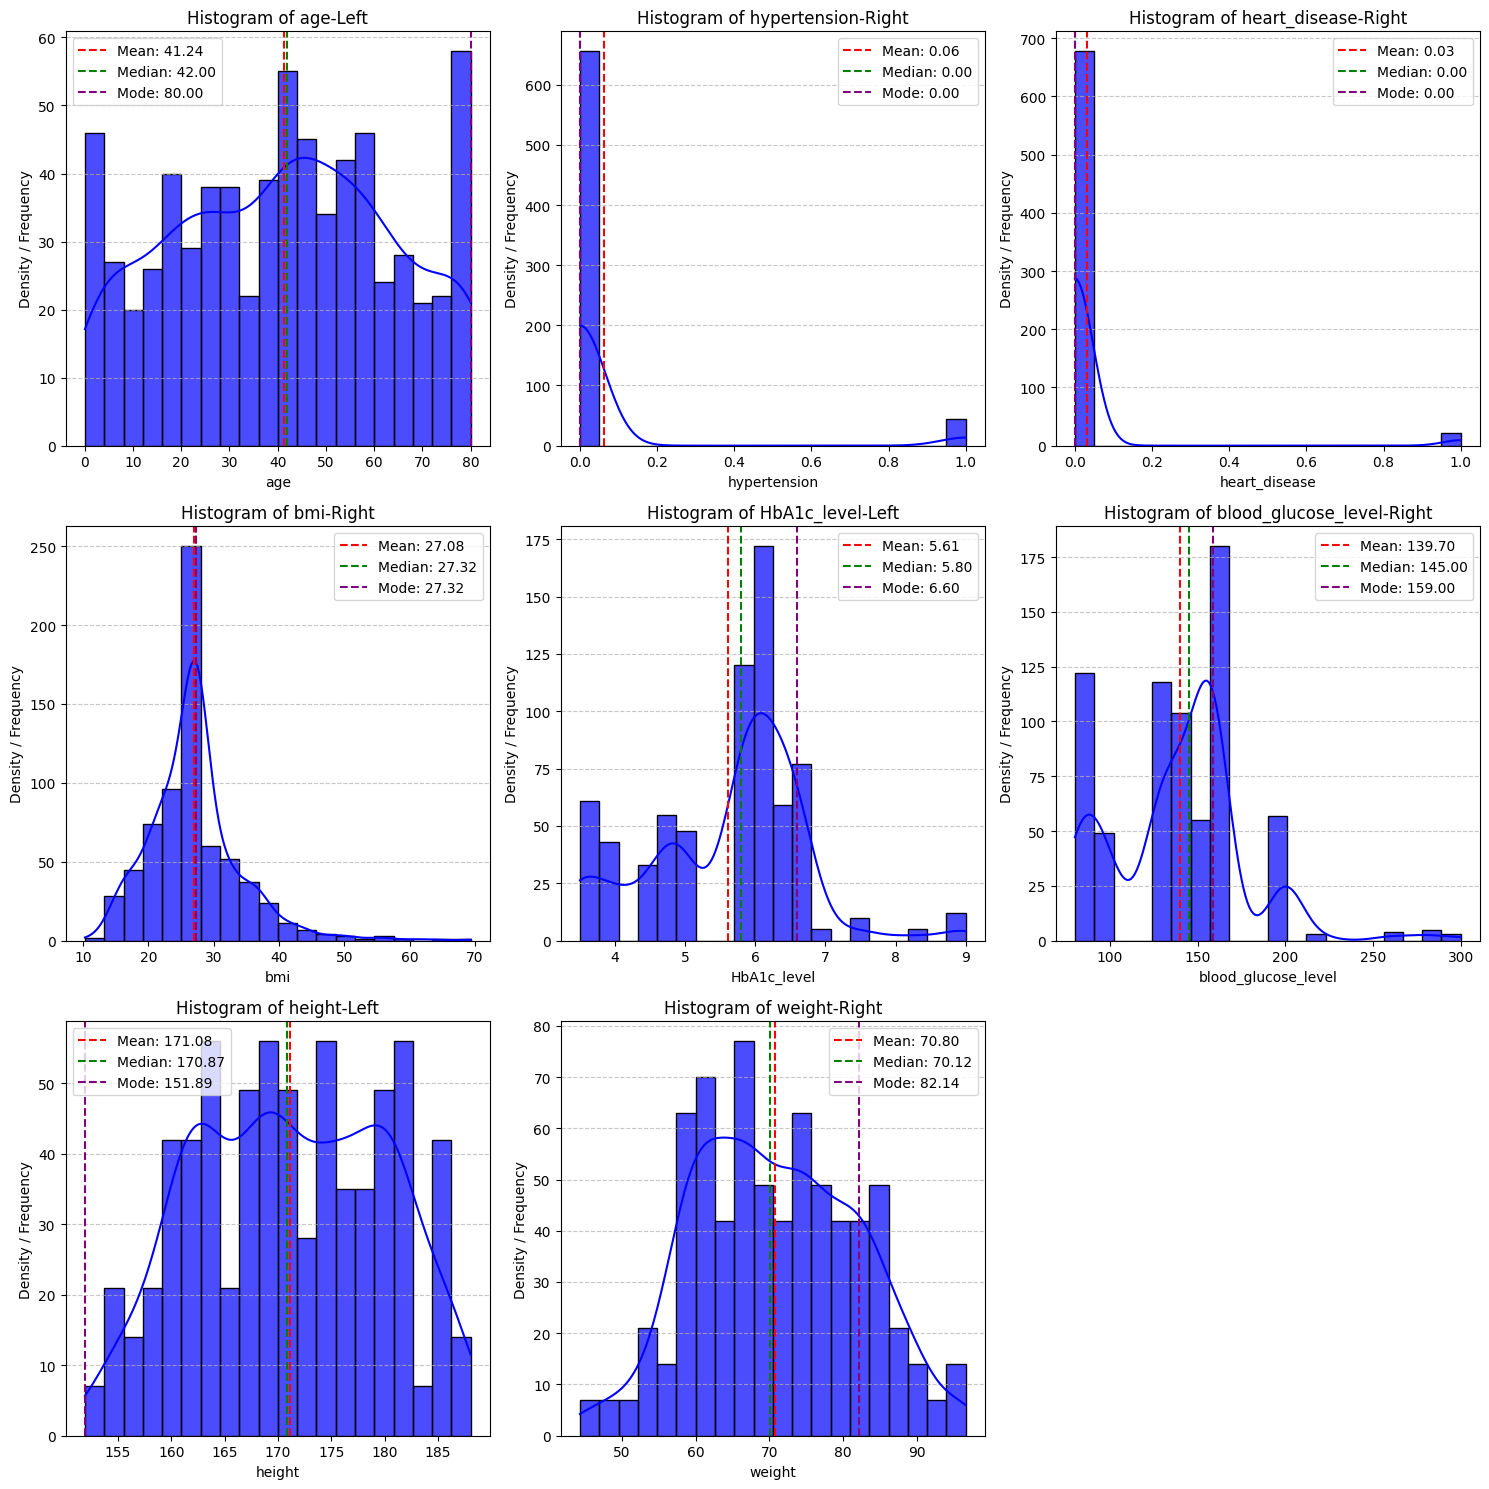

In [5]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 6) Boxplot

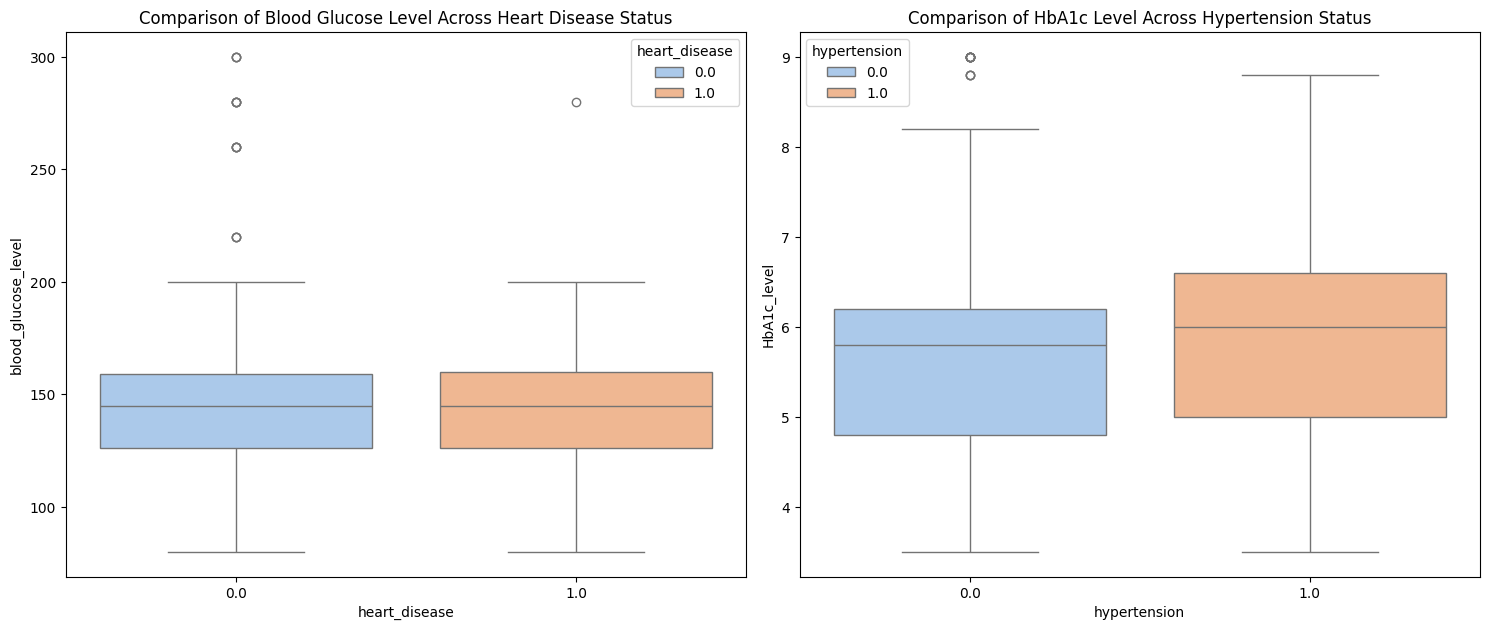

In [6]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">
    Outliers:Dots represent outliers in the boxplot
    Median (Central Line): The line inside the box
    Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
    Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.</span>

# 7) Countplots

C:\Users\HP\AppData\Local\Temp\ipykernel_7012\2568263763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_7012\2568263763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


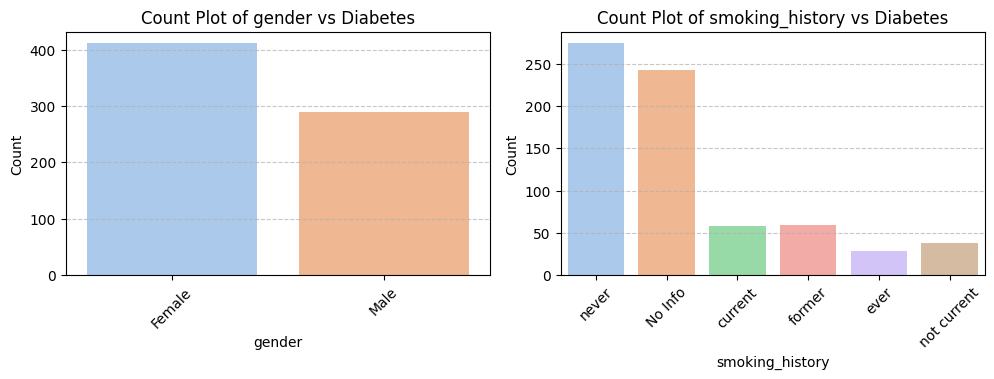

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column} vs Diabetes")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3 style="font-weight: bold;">Dataset Interpretation:</h3> <span style="font-style: italic;font-size: 18px;"> The dataset cosnists 2 categorical variables. Gender : female number is high comapred to male.</span>

# 5) Bivariate Analysis - Scatterplots

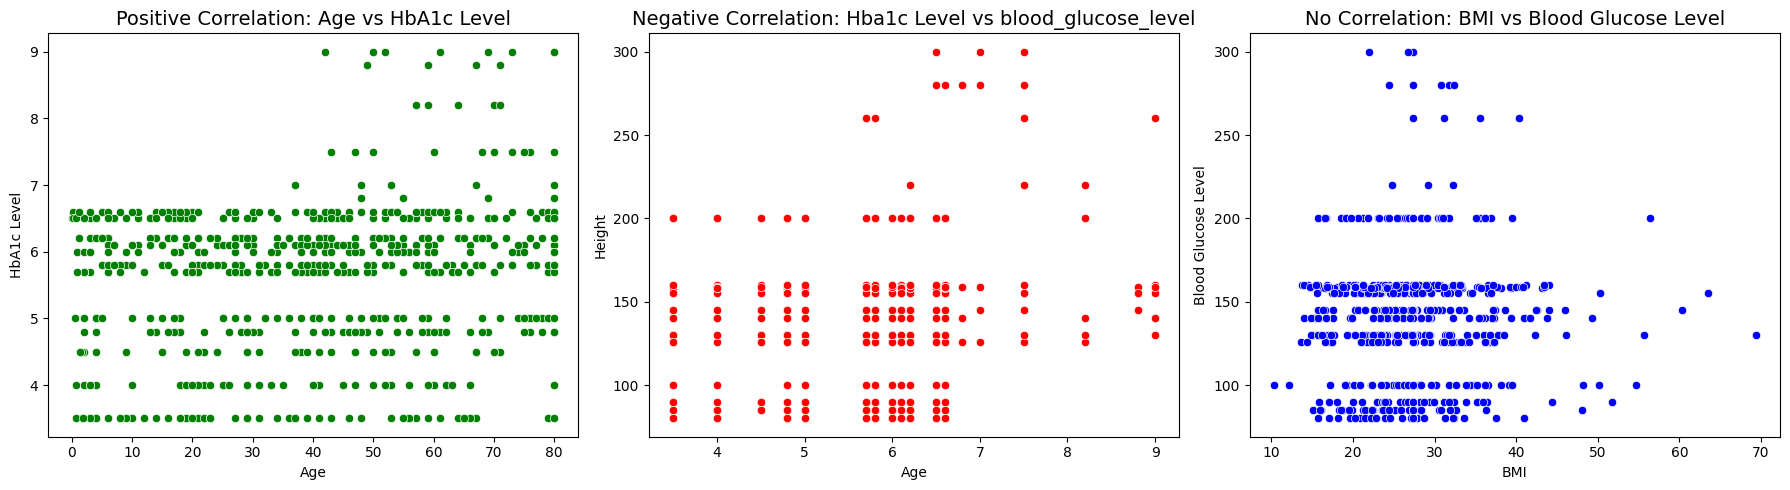

In [8]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, color='red')
plt.title('Negative Correlation: Hba1c Level vs blood_glucose_level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">Positive Correlation: As one variable increases, so does the other (Age and HbA1c).<br>
Negative Correlation: As one variable increases, the other decreases (Hba1c and blood glucose).<br>
No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).</span>

# 6) Multivariate Analysis - Heatmap

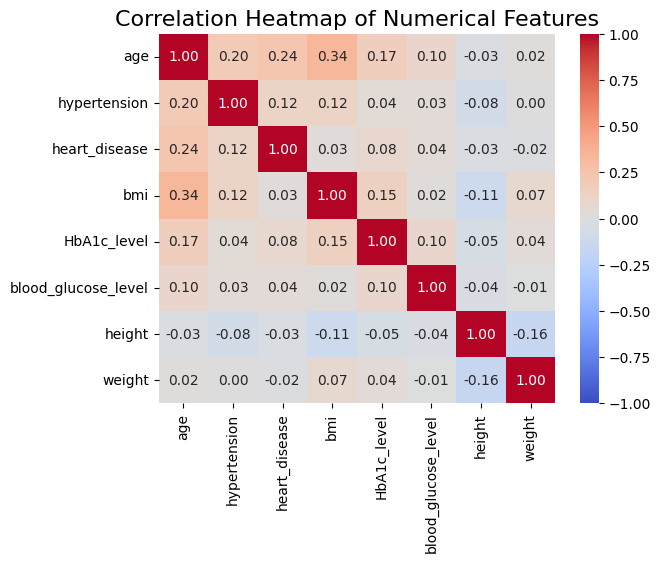

In [9]:
#Multivariate Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Correlation heatmap for numerical columns in the dataset
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">The heatmap will display a grid where each cell represents the correlation between two variables.Positive correlations are highlighted in shades of blue.Negative correlations are in shades of red.
A correlation of 0 will be neutral (often white or gray)</span>

# 7) Categorical encoding 

In [10]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["smoking_history"] = LabelEncoder().fit_transform(df['smoking_history'])
print(df)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0           0.0            1.0                4  25.19   
1         0  54.0           0.0            0.0                0  27.32   
2         1  28.0           0.0            0.0                4  27.32   
3         0  36.0           0.0            0.0                1  23.45   
4         1  76.0           1.0            1.0                1  20.14   
..      ...   ...           ...            ...              ...    ...   
695       0  62.0           0.0            0.0                2  27.27   
696       0  53.0           0.0            0.0                2  42.40   
697       0  55.0           0.0            0.0                4  35.42   
698       0  64.0           0.0            0.0                2  49.27   
699       0  40.0           0.0            0.0                4  31.16   

     HbA1c_level  blood_glucose_level  height  weight  
0            6.6                  140  171.52   74.11  

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<span style="font-style: italic;font-size: 18px;">The categorical features,gender and smoking history, have been numerically encoded for analysis.</span>
<span style="font-style: italic;font-size: 18px;">Key health indicators like BMI, HbA1c levels, and blood glucose levels play a crucial role in assessing diabetes risk.</span> 

# 8) Pair Plot

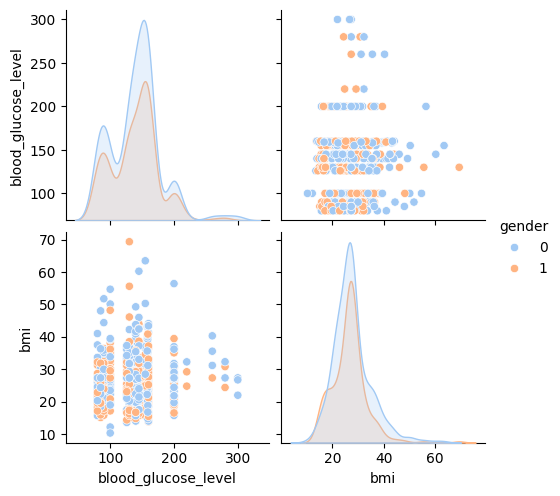

In [11]:
sns.pairplot(df, vars = [ 'blood_glucose_level', 'bmi'], hue = "gender")

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<span style="font-style: italic;font-size: 18px;">1. Most individuals have blood glucose levels between 100-150 mg/dL, with some extreme outliers above 300 mg/dL indicating high-risk.</span>  

<span style="font-style: italic;font-size: 18px;">2. The BMI distribution is right-skewed, with most values between 20-40, and a few extreme cases above 60, indicating potential obesity.</span>  
<span style="font-style: italic;font-size: 18px;">3. Scatter plots indicate no strong linear correlation between BMI and blood glucose levels, but data clusters suggest different risk groups.</span>  

# 8) Feature selection & Scaling

In [12]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'height', 'weight']
X = df[features]

In [13]:
# Split the data (only X) into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Training set shape: (469, 8)
Testing set shape: (231, 8)


<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<span style="font-style: italic;font-size: 18px;">All the features are taken for clustering and did 30% for testimg and 70% for training for x features with no target variable y and used standard scler for scaling.Training set shape: (469, 8) and Testing set shape: (231, 8)
</span> 

# 8) K-means Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

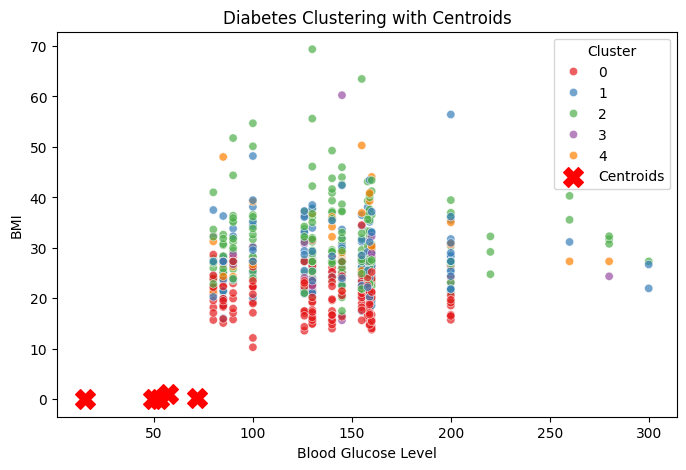


Silhouette Score for k=5: 0.1606


In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

centroids=scaler.inverse_transform(kmeans.cluster_centers_)
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['blood_glucose_level'], y=df['bmi'], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

# Labels and title
plt.xlabel("Blood Glucose Level")
plt.ylabel("BMI")
plt.title("Diabetes Clustering with Centroids")
plt.legend(title="Cluster")
plt.show()
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score for k={k}: {sil_score:.4f}")

<h3 style="font-weight: bold;">Interpretation of Clustering Results:</h3>

<span style="font-style: italic;font-size: 18px;">The scatter plot represents clusters formed using the K-Means algorithm on BMI and Blood Glucose Level. A random K value was chosen, resulting in five clusters, each represented by different colors. The red "X" marks indicate the centroids, representing the average values of BMI and Blood Glucose Level for each group. The clusters show distinct groupings, with lower blood glucose levels forming more compact clusters, while higher levels appear more dispersed. This suggests varying health patterns among individuals. Choosing an optimal K value using methods like the Elbow Method could enhance clustering accuracy.</span>  


In [16]:
kmeans.cluster_centers_

array([[-1.13556608, -0.25898489, -0.18013433, -0.7329217 , -0.27194955,
        -0.1741297 ,  0.03953   , -0.07273579],
       [ 0.48854745, -0.25898489, -0.18013433,  0.1024642 , -0.01340949,
         0.16717465,  0.83282952, -0.68428689],
       [ 0.36888577, -0.25898489, -0.18013433,  0.45329947,  0.16610824,
        -0.01686538, -0.60397785,  0.59569326],
       [ 1.32405038,  0.67742741,  5.5514126 ,  0.15569225,  0.43581498,
         0.20610341, -0.14139938, -0.11163222],
       [ 0.69760487,  3.8612292 , -0.18013433,  0.52417513,  0.24084095,
         0.12039637, -0.36214071,  0.02220191]])

In [17]:
kmeans.inertia_

3244.23364937695

<h3 style="font-weight: bold;">Interpretation of K-Means Clustering:</h3>

<span style="font-style: italic;font-size: 18px;">The K-Means algorithm identified five cluster centroids, each representing the central point of a group within the dataset.The centroid coordinates indicate how data points are distributed across two features. <br> 
The inertia value of 360.63 reflects the sum of squared distances between data points and their respective centroids, indicating the compactness of clusters. A lower inertia generally signifies well-defined clusters.</span>  


# 10) Finding optimal K - Elbow Method

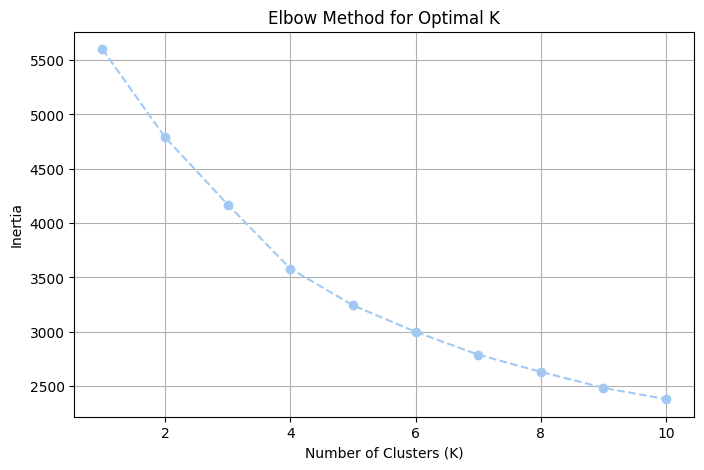

In [18]:
# Step 2: Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

<h3 style="font-weight: bold;">Interpretation of the Elbow Method:</h3>

<span style="font-style: italic;font-size: 18px;">The Elbow Method is used to determine the optimal number of clusters (K) in K-Means clustering.
The "elbow point" is where the inertia starts decreasing at a slower rate, representing the optimal K value.<br>
From the graph, the elbow appears around K = 3 or 4, suggesting that these values may provide the best balance between compactness and efficiency in clustering.</span>  


# 8) Plot Silhouette Scores

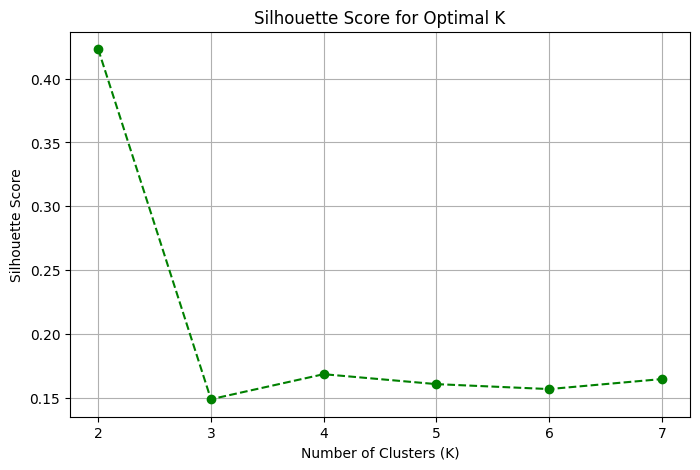

In [19]:
silhouette_scores = []
for k in range(2, 8):  # Testing K from 2 to 7
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()
plt.show()

<h3 style="font-weight: bold;">Interpretation of Silhouette Score:</h3>

<span style="font-style: italic;font-size: 18px;">The Silhouette Score measures the quality of clustering, with higher values indicating better-defined clusters.<br>
The graph shows a high score for K = 2, and
as K increases beyond 2, the Silhouette Score drops significantly and remains low, indicating weaker clustering performance.<br>
This suggests that K = 2 is the optimal choice for well-separated clusters in this dataset.</span>


# 8) Find Optimal K - Silhouette Scores

In [20]:
best_k = range(2, 8)[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters (K) = {best_k}")

Optimal Number of Clusters (K) = 2


In [21]:
# Calculate silhouette scores for different K values
silhouette_scores = {}
for k in range(2, 8):  # Testing K from 2 to 7
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[k] = score

# Print silhouette scores for each K
print("Silhouette Scores for different K values:")
for k, score in silhouette_scores.items():
    print(f"K={k}: Silhouette Score = {score:.4f}")

Silhouette Scores for different K values:
K=2: Silhouette Score = 0.4230
K=3: Silhouette Score = 0.1488
K=4: Silhouette Score = 0.1684
K=5: Silhouette Score = 0.1606
K=6: Silhouette Score = 0.1567
K=7: Silhouette Score = 0.1646


<h3 style="font-weight: bold;">Silhouette Score Summary:</h3>

<span style="font-style: italic;font-size: 18px;">The highest Silhouette Score (0.4230) is observed at K = 2, indicating the best cluster separation.
For K ≥ 3, the scores drop significantly and remain low, suggesting weaker clustering quality.</span>


# 8) Cluster visualisation (Optimal K -SI)

In [22]:
# Select features
df_short = df[['blood_glucose_level', 'bmi']]  # Modify based on dataset

# Handle NaN values (important for KMeans)
df_short = df_short.dropna()  # or use imputation if needed

# Scale data (optional, but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_short)

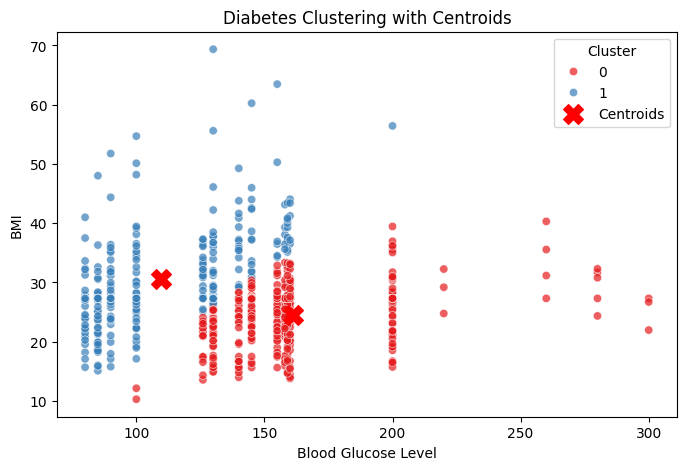

In [23]:
k = 2  # Adjust this based on silhouette or elbow method results
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Get centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['blood_glucose_level'], y=df['bmi'], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

# Labels and title
plt.xlabel("Blood Glucose Level")
plt.ylabel("BMI")
plt.title("Diabetes Clustering with Centroids")
plt.legend(title="Cluster")
plt.show()

<h3>Interpretation Summary:</h3>  
<span style="font-style: italic;font-size: 18px;">The scatter plot shows clustering results for diabetes-related data using <b>K = 2</b>, based on <b>BMI and Blood Glucose Level</b>.  

- <b>Cluster 0 (red)</b> likely represents individuals with higher blood glucose levels and lower BMI.  
- <b>Cluster 1 (blue)</b> includes individuals with lower blood glucose levels and higher BMI.  
- <b>Centroids (red X markers)</b> indicate the central points of each cluster.  

Since K = 2 had the highest Silhouette Score (0.4230), this clustering approach provides the best-defined separation between the two groups.</span>  


# 8) Cluster visualisation (Optimal K -Elbow)

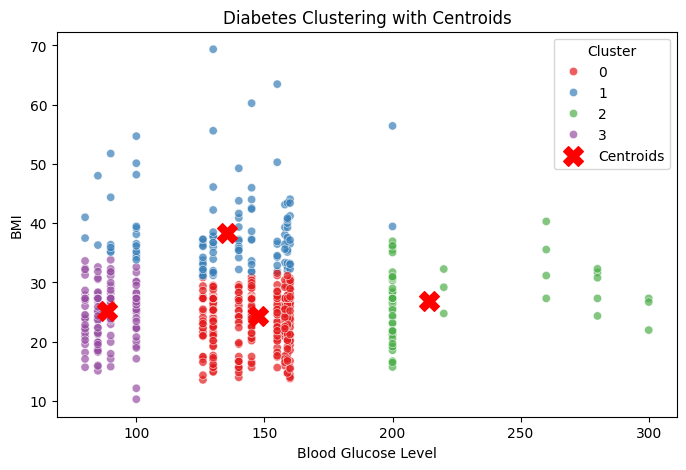

In [24]:
# Apply K-Means with optimal clusters
k = 4  # Adjust this based on silhouette or elbow method results
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Get centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['blood_glucose_level'], y=df['bmi'], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroids")

# Labels and title
plt.xlabel("Blood Glucose Level")
plt.ylabel("BMI")
plt.title("Diabetes Clustering with Centroids")
plt.legend(title="Cluster")
plt.show()

<h3 style="font-weight: bold;">Interpretation Summary:</h3>
<span style="font-style: italic;font-size: 18px;">The scatter plot represents clustering results for diabetes-related data using <b>K = 4</b>, determined as the optimal value from the elbow method.  

- <b>Cluster 0 (red):</b> Individuals with moderate blood glucose and BMI levels.  
- <b>Cluster 1 (blue):</b> Individuals with lower blood glucose but varying BMI.  
- <b>Cluster 2 (green):</b> Individuals with high blood glucose and moderate BMI.  
- <b>Cluster 3 (purple):</b> Individuals with low blood glucose and BMI.  
- <b>Centroids (red X markers):</b> Represent the central points of each cluster.  

This clustering provides a more detailed segmentation of the data, refining the groups beyond the K=2 model.  </span>


<h3 style="font-weight: bold;">Final Conclusion:</h3>

<span style="font-style: italic;font-size: 18px;">Two key techniques were used to determine the optimal number of clusters: <strong style="color: #E74C3C;">Silhouette Score</strong> and <strong style="color: #28B463;">Elbow Method</strong>. Each provided valuable insights into the dataset's clustering structure.</span>

<span style="font-style: italic;font-size: 18px;">
<ul>
    <li><strong style="color: #E74C3C;">Silhouette Score:</strong> 
        <ul>
            <li>For K=2, the silhouette score was **0.4230**, indicating well-separated clusters.</li>
            <li>Higher silhouette scores generally suggest better-defined clusters.</li>
            <li>However, using K=2 provided less meaningful segmentation.</li>
        </ul>
    </li>
    <li><strong style="color: #28B463;">Elbow Method:</strong>
        <ul>
            <li>The Elbow method suggested K=4 as the optimal cluster count.</li>
            <li>This choice balances **cluster separation and meaningful segmentation**.</li>
            <li>Though silhouette scores were slightly lower, K=4 provided better insights into different health risk groups.</li>
        </ul>
    </li>
</ul>
</span>

<span style="font-style: italic;font-size: 18px;">Conclusion: While <strong style="color: #E74C3C;">Silhouette Score</strong> suggested K=2 for better separation, the <strong style="color: #28B463;">Elbow Method</strong> (K=4) was a more practical choice as it provided a richer segmentation of individuals based on health risk factors.</span>
